(768, 1024)


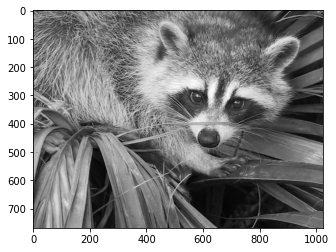

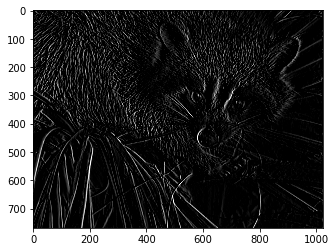

In [22]:
# https://stackoverflow.com/questions/54877892/convolving-image-with-kernel-in-fourier-domain

import numpy as np
from scipy import misc
from scipy import fftpack
import matplotlib.pyplot as plt

img = misc.face()[:,:,0]

print(img.shape)

plt.imshow(img, vmin=0, vmax=255, cmap='gray')
plt.show()

# kernel = np.ones((3,3)) / 9
kernel = np.array([[-1,0,1],
                   [-2,0,2],
                   [-1,0,1]])


# 0,1,2,3,4,5,6,7,8,9

#                  7                               7
sz = (img.shape[0] - kernel.shape[0], img.shape[1] - kernel.shape[1])  # total amount of padding

#                           (7+1)//2=4   7//2=3      (7+1)//2=4    7//2=3
kernel = np.pad(kernel, (((sz[0]+1)//2, sz[0]//2), ((sz[1]+1)//2, sz[1]//2)), 'constant')
kernel = fftpack.ifftshift(kernel)

filtered = np.real(fftpack.ifft2(fftpack.fft2(img) * fftpack.fft2(kernel)))
plt.imshow(filtered, vmin=0, vmax=255, cmap='gray')

plt.show()

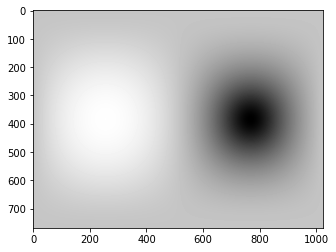

In [23]:
# kernel = np.ones((3,3)) / 9
kernel = np.array([[-1,0,1],
                   [-2,0,2],
                   [-1,0,1]])


# 0,1,2,3,4,5,6,7,8,9

#                  7                               7
sz = (img.shape[0] - kernel.shape[0], img.shape[1] - kernel.shape[1])  # total amount of padding

#                           (7+1)//2=4   7//2=3      (7+1)//2=4    7//2=3
kernel = np.pad(kernel, (((sz[0]+1)//2, sz[0]//2), ((sz[1]+1)//2, sz[1]//2)), 'constant')
# kernel = fftpack.ifftshift(kernel)

H = np.fft.fft2(kernel)

H_im = np.imag(H)*(1j)


H_im_pr = np.empty(H_im.shape).astype(complex)

for i in range(H_im.shape[0]):
    for j in range(H_im.shape[1]):
        H_im_pr[i][j] = H_im[i][j]*((-1)**(i+j))
        

H_im_pr_shift = np.fft.fftshift(H_im_pr)


# print(np.min(H_im_pr_shift))
# print(np.max(H_im_pr_shift))
# print(H_im_pr_shift)

def get_fft_image_filter(f_complex):
    # Get absolute value
    f_complex = np.imag(f_complex)
    f_complex = f_complex + np.abs(np.min(f_complex))

    f_abs = f_complex + 1

    # Scale
    f_bounded = 20 * np.log(f_abs)
    f_img = 255 * f_bounded / np.max(f_bounded)
    f_img = f_img.astype(np.uint8)
    return f_img

plt.imshow(get_fft_image_filter(H_im_pr_shift), cmap='gray')
plt.show()